# Data Science Analyzation on Used Car Sales 

This jupitor notebook contains all work done on 1st dataset of imbalanced datasets. 

The github repository link is: 

https://github.com/anummanzoor901/Datascience888.git

To perform this assignment following steps are followed:

1.   Import dataset and insight 
2.   Making data imbalanced and visualization
3.   Preprocessing on the dataset
4.   Prediction,training, for this decision tree, xgboost and random forest are used.




# 1) Import dataset and insight

### 1.1) Importing Libraries

##### We will start with importing all important libraries and function required for this assignment. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median

import lightgbm as lgb
import xgboost as xgb


from sklearn.metrics import mean_squared_error
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1.2) Analysing Dataset

##### First we import dataset and check the insight of it. How many columns, rows, null values etc this dataset contains. 

In [ ]:
df=pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.shape

(4340, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


### 1.3) Extract the requird data

##### I will extract data of "price, year, manufacturer, model, condition, transmission, type, paint_color, state, lat, long"
from this dataset. As only these columns are important to make a useful prediction. Other columns will be removed. 

In [ ]:


#columns=[ "price", "year", "manufacturer", "model", "condition", "transmission", "type", "paint_color", "state", "lat", "long"]

In [ ]:
#df = df[columns]






Checking if dataset contains null values

In [ ]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

# 2) Imbalancing dataset 65%, 75%, 95%

To make my data imbalance I used random data creation method. It will create a random data to imbalanced the classes.

website which I used to study about random sampling: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html



### 2.1) imbalance (65%)

first I will generate 65% imbalanced data and visualize it. 

In [ ]:
rows = df.sample(frac =.65)
rows

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
2835,Hyundai Xcent 1.2 Kappa SX,2016,350000,12000,Petrol,Individual,Manual,First Owner
2951,Skoda Rapid 1.5 TDI AT Ambition,2015,599000,46957,Diesel,Dealer,Automatic,First Owner
2365,Nissan Terrano XL P,2017,844999,30000,Petrol,Individual,Manual,First Owner
3027,Chevrolet Beat Diesel,2012,160000,90000,Diesel,Individual,Manual,Second Owner
1466,Mahindra Renault Logan 1.5 DLS,2008,89999,213000,Diesel,Individual,Manual,First Owner
...,...,...,...,...,...,...,...,...
387,Maruti Alto 800 LXI,2016,130000,40000,Petrol,Individual,Manual,First Owner
2301,Volkswagen Jetta 2.0L TDI Highline,2015,790000,52517,Diesel,Dealer,Manual,First Owner
2315,Skoda Octavia Elegance 2.0 TDI AT,2014,1200000,135000,Diesel,Individual,Automatic,Third Owner
2405,Honda Jazz Select Edition Active,2010,285000,60000,Petrol,Dealer,Manual,Second Owner


277472 rows are created randomly, and from the above display we can see that Nulls are randomly generated too. It created 65% random data. 

Next, I will combine and shuffle these randomly created rows with original dataset. 

In [ ]:
df = pd.concat([df, rows])
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
387,Maruti Alto 800 LXI,2016,130000,40000,Petrol,Individual,Manual,First Owner
2301,Volkswagen Jetta 2.0L TDI Highline,2015,790000,52517,Diesel,Dealer,Manual,First Owner
2315,Skoda Octavia Elegance 2.0 TDI AT,2014,1200000,135000,Diesel,Individual,Automatic,Third Owner
2405,Honda Jazz Select Edition Active,2010,285000,60000,Petrol,Dealer,Manual,Second Owner


#### Visualizing data

Vehicle purchase from 2000 to 2021

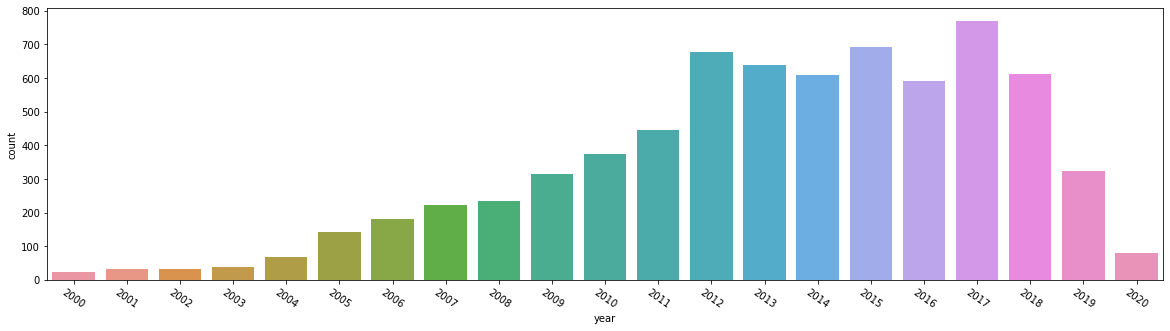

In [ ]:
df_year = df[(df["year"]>1999) & (df["year"]<2022)].copy()
df_year["year"] = df_year["year"].astype(int)
plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.countplot(data= df_year,x="year")
plt.show()

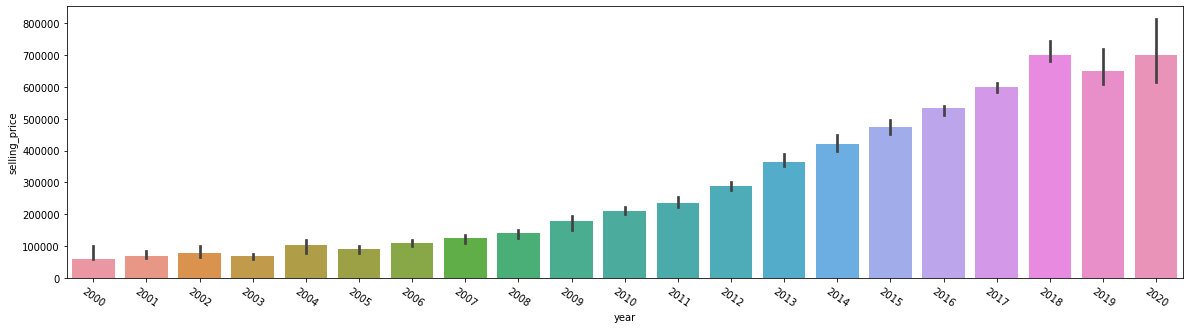

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.barplot(data= df_year,x="year", y= "selling_price",estimator=median)
plt.show()

We can know vehicle's price is increasing from median graph. Except for 2021, since the dataset was created in 2021, not all records are present. 

#### Manufacturer company records

to see which manufacturer is smallest to largest

In [ ]:
df_year["tmp"] = 1
data = pd.pivot_table(df_year, index = "manufacturer", columns="year",values="tmp",aggfunc=np.sum)
data = data.fillna(0)
data.loc['others'] = data[data<200].sum()
data[data<200] = 0

plt.figure(figsize=(15,15))
tmp_data1 = data[2000].sort_values(ascending=False)
plt.subplot(221)

tmp_data1[tmp_data1>0].plot.pie(autopct="%.1f%%",title="2000")
plt.axis("off")

tmp_data2 = data[2005].sort_values(ascending=False)
plt.subplot(222)

tmp_data2[tmp_data2>0].plot.pie(autopct="%.1f%%",title="2005")
plt.axis("off")

tmp_data3 = data[2010].sort_values(ascending=False)
plt.subplot(223)
tmp_data3[tmp_data3>0].plot.pie(autopct="%.1f%%",title="2010")
plt.axis("off")

tmp_data4 = data[2020].sort_values(ascending=False)
plt.subplot(224)

tmp_data4[tmp_data4>0].plot.pie(autopct="%.1f%%",title="2020")
plt.axis("off")


plt.show()

#### Top 10 models comparing

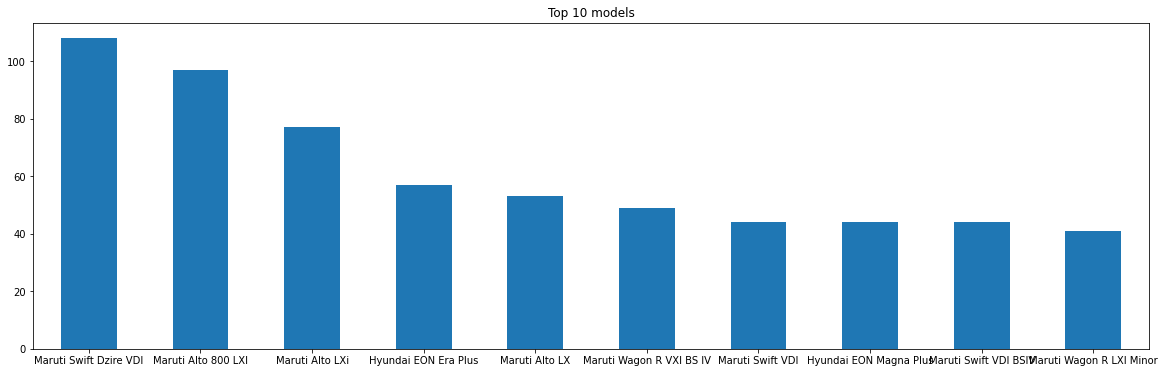

In [ ]:
df_year['name'].value_counts().head(10).plot.bar(figsize=(20,6),rot=0, title="Top 10 models")
plt.show()

In [ ]:
#### Best and more bought color

In [ ]:
# plt.figure(figsize=(15,4))
# sns.countplot(data=df_year,x="paint_color")
# plt.show()

The most famous color is white, black and silver

#### Comparing color by condition

for many buyers condition along with color matters alot, lets graoh it. 

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_year, x="paint_color", hue="condition")
plt.show()

#### Plotng heat map

Heat map to analyse data and their corelation with each other.

In [ ]:
sns.set_theme(style="white")
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 11)),
                 columns=list(df))
corr = d.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 11))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### 2.2) imbalancing (75%)

In [ ]:
df1=pd.read_csv('vehicles.csv')
columns=[ "price", "year", "manufacturer", "model", "condition", "transmission", "type", "paint_color", "state", "lat", "long"]
df1 = df1[columns]
rows1 = df1.sample(frac =.75)
rows1

,price,year,manufacturer,model,condition,transmission,type,paint_color,state,lat,long
170079,20988,2014.0,chevrolet,silverado 1500 4x4 z71,excellent,automatic,pickup,white,ks,NaN,NaN
287442,17488,2018.0,hyundai,santa fe sport,excellent,automatic,SUV,white,oh,41.246430,-81.358530
279396,15990,2017.0,toyota,yaris ia sedan 4d,good,other,sedan,red,ny,43.160000,-77.610000
33580,4900,2009.0,bmw,335i,good,automatic,other,custom,ca,33.851200,-118.145700
141372,39995,1996.0,porsche,911 carrera,NaN,automatic,convertible,silver,il,41.572305,-88.113993
...,...,...,...,...,...,...,...,...,...,...,...
339788,18695,2013.0,ram,1500,NaN,automatic,pickup,NaN,pa,40.894535,-74.152367
412741,12999,2016.0,chevrolet,malibu lt,NaN,automatic,sedan,silver,wa,46.214960,-119.122349
251740,5999,2011.0,volkswagen,golf,NaN,automatic,other,blue,nj,40.319200,-74.428500
217995,27990,2019.0,infiniti,qx50 luxe sport utility,good,automatic,hatchback,NaN,mn,45.550000,-94.220000


In [ ]:
df1 = pd.concat([df1, rows1])
df1

,price,year,manufacturer,model,condition,transmission,type,paint_color,state,lat,long
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
339788,18695,2013.0,ram,1500,NaN,automatic,pickup,NaN,pa,40.894535,-74.152367
412741,12999,2016.0,chevrolet,malibu lt,NaN,automatic,sedan,silver,wa,46.214960,-119.122349
251740,5999,2011.0,volkswagen,golf,NaN,automatic,other,blue,nj,40.319200,-74.428500
217995,27990,2019.0,infiniti,qx50 luxe sport utility,good,automatic,hatchback,NaN,mn,45.550000,-94.220000


In [ ]:
df1 = df1.dropna()
df1.shape

(305380, 11)

#### Visualizing data after imbalancing

Vehicle purchase from 2000 to 2021

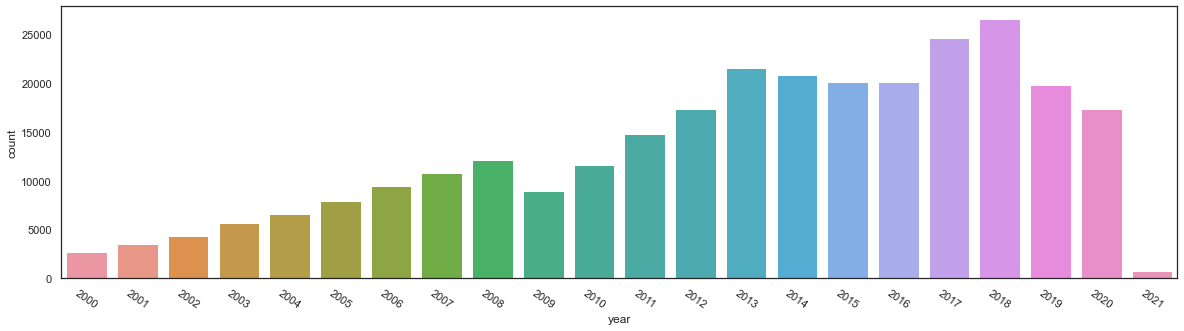

In [ ]:
df_year = df1[(df1["year"]>1999) & (df1["year"]<2022)].copy()
df_year["year"] = df_year["year"].astype(int)
plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.countplot(data= df_year,x="year")
plt.show()

#### Comparing color by condition adrer 75% imbalancing

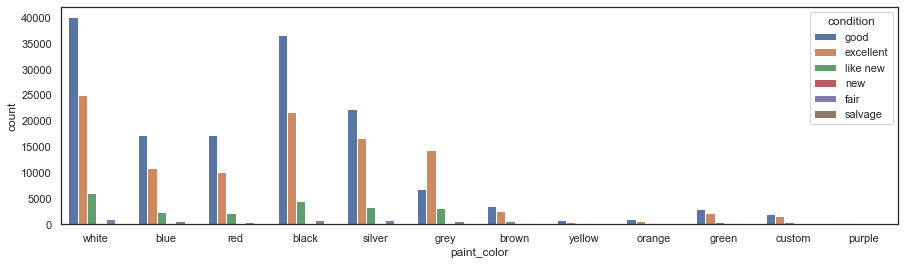

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_year, x="paint_color", hue="condition")
plt.show()

### 2.3) Imbalancing (95%)

In [ ]:
rows2  = df1.sample(frac =.95)
rows2

,price,year,manufacturer,model,condition,transmission,type,paint_color,state,lat,long
144736,33990,2018.0,gmc,sierra 1500 double cab sle,good,other,pickup,white,il,42.270000,-89.060000
408101,4999,2011.0,kia,sorento,excellent,automatic,SUV,black,wa,47.103695,-122.435819
155778,7500,2008.0,chrysler,sebring touring,like new,automatic,convertible,white,ia,41.963666,-91.720216
300904,15975,2010.0,chevrolet,silverado 1500,excellent,automatic,pickup,red,oh,40.071628,-80.859182
284916,7895,2012.0,jeep,compass latitude 4x4,excellent,automatic,SUV,red,nh,42.980400,-71.457402
...,...,...,...,...,...,...,...,...,...,...,...
6835,45995,2021.0,acura,tlx a-spec awd,excellent,automatic,sedan,grey,ak,61.217811,-149.870231
76751,29990,2019.0,kia,niro ev ex wagon 4d,good,other,wagon,black,co,39.760000,-104.870000
171171,15990,2017.0,ford,c-max hybrid se wagon 4d,good,other,wagon,blue,ky,38.040000,-84.450000
256529,4995,2010.0,honda,odyssey,good,automatic,van,black,nj,39.937155,-75.088194


In [ ]:
df2 = pd.concat([df1, rows2])
df2

,price,year,manufacturer,model,condition,transmission,type,paint_color,state,lat,long
27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,other,pickup,white,al,32.590000,-85.480000
28,22590,2010.0,chevrolet,silverado 1500,good,other,pickup,blue,al,32.590000,-85.480000
29,39590,2020.0,chevrolet,silverado 1500 crew,good,other,pickup,red,al,32.590000,-85.480000
30,30990,2017.0,toyota,tundra double cab sr,good,other,pickup,red,al,32.590000,-85.480000
31,15000,2013.0,ford,f-150 xlt,excellent,automatic,truck,black,al,32.592000,-85.518900
...,...,...,...,...,...,...,...,...,...,...,...
6835,45995,2021.0,acura,tlx a-spec awd,excellent,automatic,sedan,grey,ak,61.217811,-149.870231
76751,29990,2019.0,kia,niro ev ex wagon 4d,good,other,wagon,black,co,39.760000,-104.870000
171171,15990,2017.0,ford,c-max hybrid se wagon 4d,good,other,wagon,blue,ky,38.040000,-84.450000
256529,4995,2010.0,honda,odyssey,good,automatic,van,black,nj,39.937155,-75.088194


In [ ]:
df2.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
transmission    0
type            0
paint_color     0
state           0
lat             0
long            0
dtype: int64

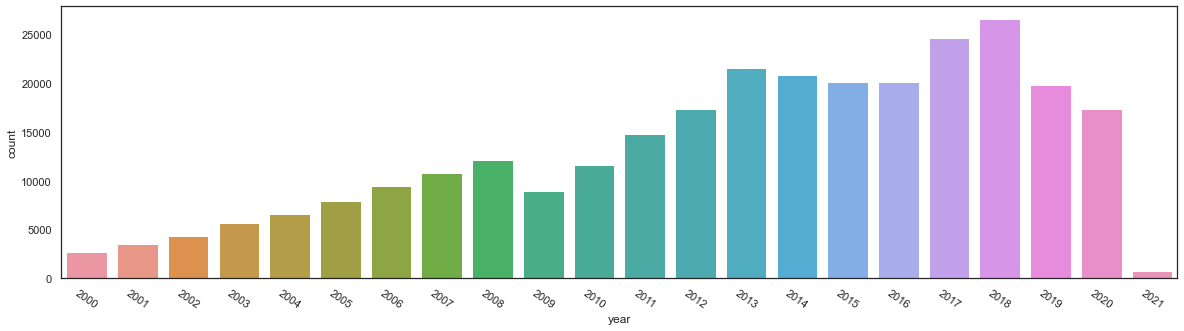

In [ ]:
df_year = df1[(df1["year"]>1999) & (df1["year"]<2022)].copy()
df_year["year"] = df_year["year"].astype(int)
plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.countplot(data= df_year,x="year")
plt.show()

# 3) Preprocessing on the dataset

##### Introdcuing a new column price category which will destribute prices in to 3 categories, low, medium and high, based on prices. 

In [ ]:
df['Price Category'] = np.where(df.selling_price <= 100000, 1, 
                                  np.where(df.selling_price >= 1200000, 3, 2))

df['fuel'] = np.where(df.fuel == 'Petrol', 1,
                      np.where(df.fuel == 'Diesel', 2, 3))

df['seller_type'] = np.where(df.seller_type == 'Individual', 1, 2)
df['transmission'] = np.where(df.transmission == 'Manual', 1,
                      np.where(df.transmission == 'Automatic', 2, 3))
df['owner'] = np.where(df.owner == 'First Owner', 1,
                      np.where(df.owner == 'Second Owner', 2, 3))
df.drop('name', axis=1, inplace=True)
df                      

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Price Category
0,2007,60000,70000,1,1,1,1,1
1,2007,135000,50000,1,1,1,1,2
2,2012,600000,100000,2,1,1,1,2
3,2017,250000,46000,1,1,1,1,2
4,2014,450000,141000,2,1,1,2,2
...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,2,1,1,2,2
4336,2014,409999,80000,2,1,1,2,2
4337,2009,110000,83000,1,1,1,2,2
4338,2016,865000,90000,2,1,1,1,2


In [ ]:
df.to_csv (r'/content/2nd Dataset Car Dekho.csv', index = False, header=True)

In [ ]:
print(df)


      year  selling_price  km_driven  fuel  seller_type  transmission  owner  \
0     2007          60000      70000     1            1             1      1   
1     2007         135000      50000     1            1             1      1   
2     2012         600000     100000     2            1             1      1   
3     2017         250000      46000     1            1             1      1   
4     2014         450000     141000     2            1             1      2   
...    ...            ...        ...   ...          ...           ...    ...   
4335  2014         409999      80000     2            1             1      2   
4336  2014         409999      80000     2            1             1      2   
4337  2009         110000      83000     1            1             1      2   
4338  2016         865000      90000     2            1             1      1   
4339  2016         225000      40000     1            1             1      1   

      Price Category  
0               

# 4) Prediction,training: for this decision tree, xgboost and random forest are used.

###4.1 Lightgbm

I selected Lightgbm initially for this project as it provide effective and efficient implementation. But I face some errors, I tried to solve them whole day but couldn't reaeched the solution. 

In [ ]:
X, y = df.iloc[:,:-1],df.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# y_train = training_data['Price Category']
# X_train = training_data.drop(['Price Category'], axis=1)
X_test

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
527,2017,2750000,41000,2,1,2,1
2524,2015,225000,68745,2,2,1,1
1109,2016,120000,120000,1,1,1,1
3939,2017,725000,36000,2,2,1,1
3753,2014,600000,87000,2,1,1,2
...,...,...,...,...,...,...,...
3299,2010,170000,70000,1,1,1,1
3859,2018,625000,13800,1,1,2,1
1589,2013,325000,94000,2,1,1,2
2311,2014,275000,30000,1,1,1,1


In [ ]:
# y_test = testing_data['Price Category']
# X_test = testing_data.drop(['Price Category'], axis=1)

In [ ]:
import lightgbm

train_data = lightgbm.Dataset(X_train, y_train)
test_data = lightgbm.Dataset(X_test, label=y_test)

In [ ]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=500,
                       early_stopping_rounds=10)

[1]	valid_0's auc: 1
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 1
[3]	valid_0's auc: 1
[4]	valid_0's auc: 1
[5]	valid_0's auc: 1
[6]	valid_0's auc: 1
[7]	valid_0's auc: 1
[8]	valid_0's auc: 1
[9]	valid_0's auc: 1
[10]	valid_0's auc: 1
[11]	valid_0's auc: 1
Early stopping, best iteration is:
[1]	valid_0's auc: 1


In [ ]:
def run_lgb(X_train, y_train, X_test, y_test, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 40,
        "learning_rate" : 0.004,
        "bagging_fraction" : 0.6,
        "feature_fraction" : 0.6,
        "bagging_frequency" : 6,
        "bagging_seed" : 42,
        "verbosity" : -1,
        "seed": 42
    }
    lgtrain = lgb.Dataset(X_train, label=y_train)
    lgval = lgb.Dataset(X_test, label=y_test)
    evals_result = {}
    model = lgb.train(params, lgtrain, 5000, 
                      valid_sets=[lgtrain, lgval], 
                      early_stopping_rounds=100, 
                      verbose_eval=150, 
                      evals_result=evals_result)
    
    pred_test_y = np.expm1(model.predict(test_X, num_iteration=model.best_iteration))
    return pred_test_y, model, evals_result

###4.2 Random forest

In [ ]:
pip install --upgrade category_encoders

In [ ]:
encoder = ce.OrdinalEncoder(cols=['year',	'selling_price',	'km_driven',	'fuel',	'seller_type',	'transmission',	'owner'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1791,1,1,1,1,1,1,1
1748,2,2,2,1,2,1,2
3794,1,3,3,1,1,1,3
1571,2,4,4,2,1,1,2
2903,3,5,5,2,1,1,2


##### We now have training and test set ready for model building.

##### With estimator = 10

In [ ]:

# instantiate the classifier 

rf = RandomForestClassifier(random_state=0)
# fit the model

rf.fit(X_train, y_train)
# Predict the Test dataset results

y_pred = rf.predict(X_test)
# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with 10 decision-trees : 0.9320


##### Estimator = 100

In [ ]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

rfc_100.fit(X_train, y_train)
# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)
# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9320


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

selling_price    0.370793
year             0.274961
km_driven        0.148468
transmission     0.107522
fuel             0.050486
owner            0.030600
seller_type      0.017169
dtype: float64

##### We can see that the most important feature is selling_price and least important feature is seller_type

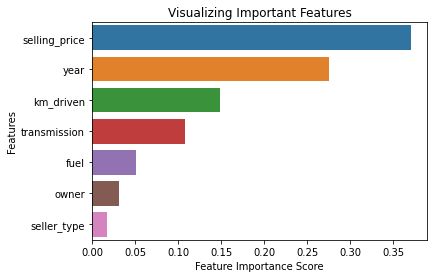

In [ ]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')
# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.76      0.75        84
           2       0.95      0.97      0.96       726
           3       0.93      0.74      0.83        58

    accuracy                           0.93       868
   macro avg       0.88      0.82      0.85       868
weighted avg       0.93      0.93      0.93       868



### 4.3 Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
       
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
     
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
       
        print(f"CLASSIFICATION REPORT:\n{clf_report}")

        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 100.00%
CLASSIFICATION REPORT:
               1       2      3  accuracy  macro avg  weighted avg
precision    1.0     1.0    1.0       1.0        1.0           1.0
recall       1.0     1.0    1.0       1.0        1.0           1.0
f1-score     1.0     1.0    1.0       1.0        1.0           1.0
support    295.0  2968.0  209.0       1.0     3472.0        3472.0
Confusion Matrix: 
 [[ 295    0    0]
 [   0 2968    0]
 [   0    0  209]]

Test Result:

Accuracy Score: 91.59%
CLASSIFICATION REPORT:
                   1           2          3  accuracy   macro avg  \
precision   0.639640    0.968661   0.800000  0.915899    0.802767   
recall      0.845238    0.936639   0.758621  0.915899    0.846833   
f1-score    0.728205    0.952381   0.778761  0.915899    0.819782   
support    84.000000  726.000000  58.000000  0.915899  868.000000   

           weighted avg  
precision      0.925550  
recall         0.915899  
f1-score       0.919085  
support      868.

#### decision tree with the hyperparamters

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:

Accuracy Score: 97.21%
CLASSIFICATION REPORT:
                    1            2           3  accuracy    macro avg  \
precision    0.945392     0.978029    0.914286  0.972062     0.945903   
recall       0.938983     0.989892    0.765550  0.972062     0.898142   
f1-score     0.942177     0.983925    0.833333  0.972062     0.919812   
support    295.000000  2968.000000  209.000000  0.972062  3472.000000   

           weighted avg  
precision      0.971419  
recall         0.972062  
f1-score       0.971313  
support     3472.000000  
Confusion Matrix: 
 [[ 277   18    0]
 [  15 2938   15]
 [   1   48  160]]

Test Result:

Accuracy Score: 91.59%
CLASSIFICATION REPORT:
                   1           2          3  accuracy   macro avg  \
precision   0.669811    0.959441   0.808511  0.91

### 4.4 XGBoost

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   year            4340 non-null   int64
 1   selling_price   4340 non-null   int64
 2   km_driven       4340 non-null   int64
 3   fuel            4340 non-null   int64
 4   seller_type     4340 non-null   int64
 5   transmission    4340 non-null   int64
 6   owner           4340 non-null   int64
 7   Price Category  4340 non-null   int64
dtypes: int64(8)
memory usage: 271.4 KB


##### Seperating for testing and training

##### Now we will divide our dataset into 2 parts, 80% into training and 20% in testing data.


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

##### XGB hyperparameters

In [46]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [47]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[07:20:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [48]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.578941


In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# accuracy_score(y_test, y_pred, normalize=False)


0.9320276497695853